In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# Try reading with ISO-8859-1 encoding
df = pd.read_csv('Data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
df.drop(['User_ID', 'Cust_name', 'Product_ID', 'Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
df.dropna(subset=['Amount'], inplace=True)

In [8]:
df['Amount'] = df['Amount'].astype(int)

In [9]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            11239 non-null  object
 1   Age Group         11239 non-null  object
 2   Age               11239 non-null  int64 
 3   Marital_Status    11239 non-null  int64 
 4   State             11239 non-null  object
 5   Zone              11239 non-null  object
 6   Occupation        11239 non-null  object
 7   Product_Category  11239 non-null  object
 8   Orders            11239 non-null  int64 
 9   Amount            11239 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 965.9+ KB


Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df.describe()

,Age,Marital_Status,Orders,Amount
count,11239.000000,11239.000000,11239.000000,11239.000000
mean,35.410357,0.420055,2.489634,9453.610553
std,12.753866,0.493589,1.114967,5222.355168
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,2.000000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12675.000000
max,92.000000,1.000000,4.000000,23952.000000


In [11]:
for col in df.columns:
    print(f"{col} unique values: {df[col].nunique()}")

Gender unique values: 2
Age Group unique values: 7
Age unique values: 81
Marital_Status unique values: 2
State unique values: 16
Zone unique values: 5
Occupation unique values: 15
Product_Category unique values: 18
Orders unique values: 4
Amount unique values: 6583


# Which gender has a higher purchasing power?

### Create a count plot for gender.

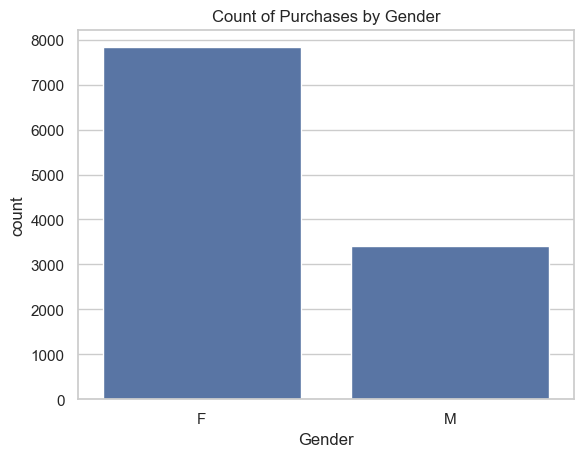

In [12]:
sns.countplot(data = df, x = 'Gender')
plt.title('Count of Purchases by Gender')
plt.show()

### Plot a bar chart to show the total purchase amount by gender.

In [13]:
gender_amount = df.groupby('Gender')['Amount'].sum().reset_index()

In [14]:
print(gender_amount)

  Gender    Amount
0      F  74335853
1      M  31913276


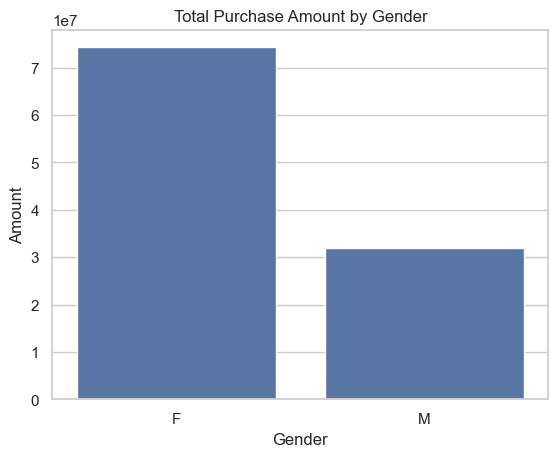

In [15]:
sns.barplot(data = gender_amount, x = 'Gender', y = 'Amount')
plt.title('Total Purchase Amount by Gender')
plt.show()

# Which age group has the most purchases, and is there a trend in purchasing power by age?

### Plot a count plot of age groups with hue as gender.

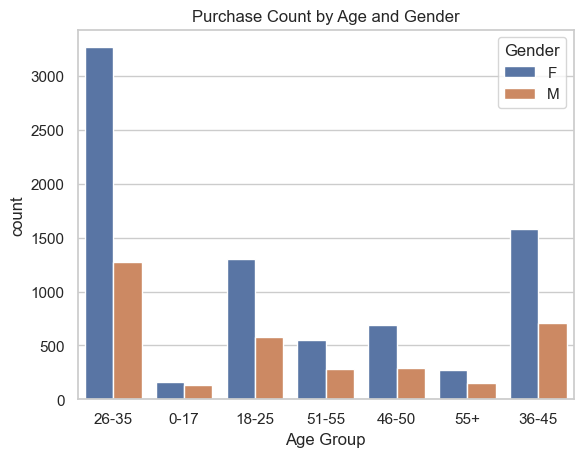

In [52]:
sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.title('Purchase Count by Age and Gender')
plt.show()

### Plot a bar chart showing total purchase amount by age group.

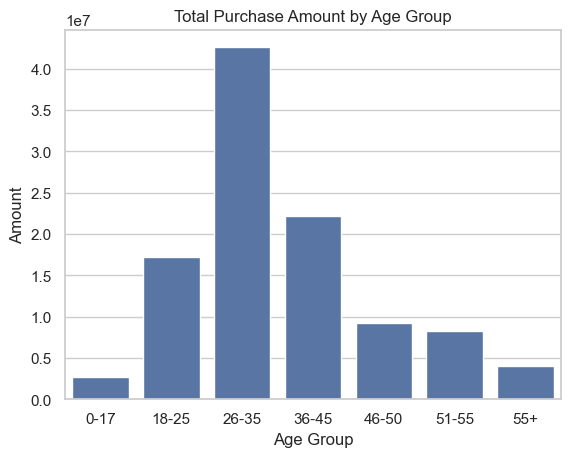

In [53]:
age_amount = df.groupby('Age Group')['Amount'].sum().reset_index()
sns.barplot(data = age_amount, x = 'Age Group', y = 'Amount')
plt.title('Total Purchase Amount by Age Group')
plt.show()

# Which states generate the highest number of orders and revenue?

### Plot bar charts for the number of orders and total amount by state, focusing on the top 10 states.

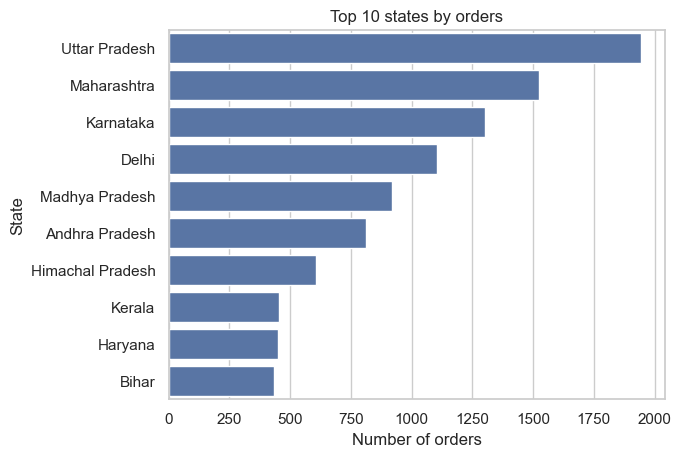

In [18]:
top_states_orders = df['State'].value_counts().head(10)
sns.barplot(x = top_states_orders.values, y = top_states_orders.index)
plt.title('Top 10 states by orders')
plt.xlabel('Number of orders')
plt.show()

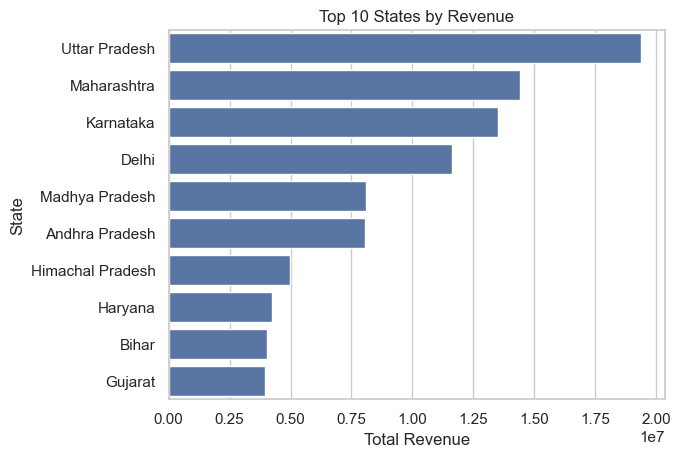

In [19]:
top_states_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x = top_states_amount.values, y = top_states_amount.index)
plt.title('Top 10 States by Revenue')
plt.xlabel('Total Revenue')
plt.show()

# How does marital status affect purchasing behavior?

### Plot a count plot for marital status and a bar chart showing total amount spent by marital status, with gender as a hue.

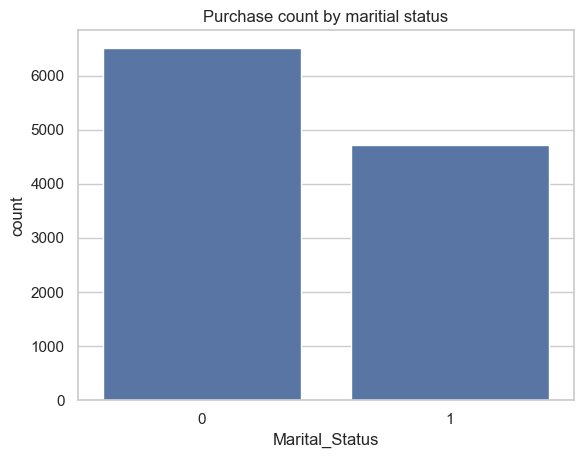

In [20]:
sns.countplot(data = df, x = 'Marital_Status')
plt.title('Purchase count by maritial status')
plt.show()

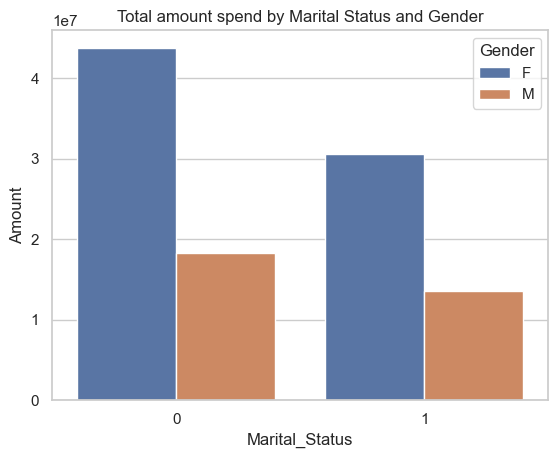

In [23]:
maritial_amount = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()
sns.barplot(data = maritial_amount, x = 'Marital_Status', y = 'Amount', hue = 'Gender')
plt.title('Total amount spend by Marital Status and Gender')
plt.show()

# Which occupations contribute most to sales?

### Create a count plot for occupation and a bar chart for total sales by occupation.

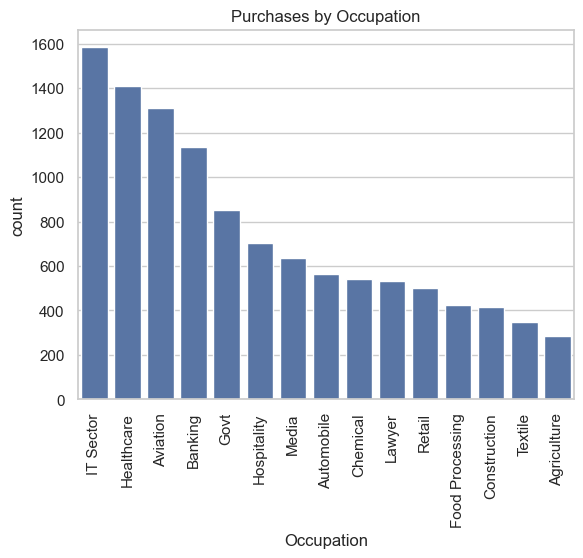

In [42]:
sns.countplot(data = df, x = 'Occupation', order = df['Occupation'].value_counts().index)
plt.title('Purchases by Occupation')
plt.xticks(rotation = 90)
plt.show()

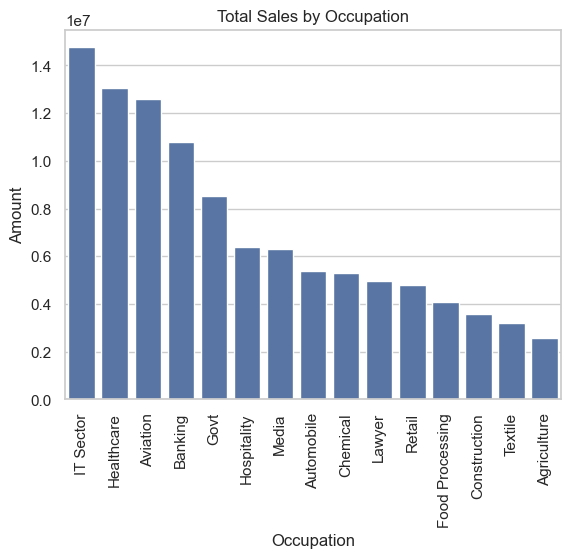

In [39]:
occ_amount = df.groupby('Occupation')['Amount'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data  = occ_amount, x = 'Occupation', y = 'Amount')
plt.title('Total Sales by Occupation')
plt.xticks(rotation = 90)
plt.show()

# What product categories are the most popular, and which ones generate the most revenue?

### Create a count plot for product categories.

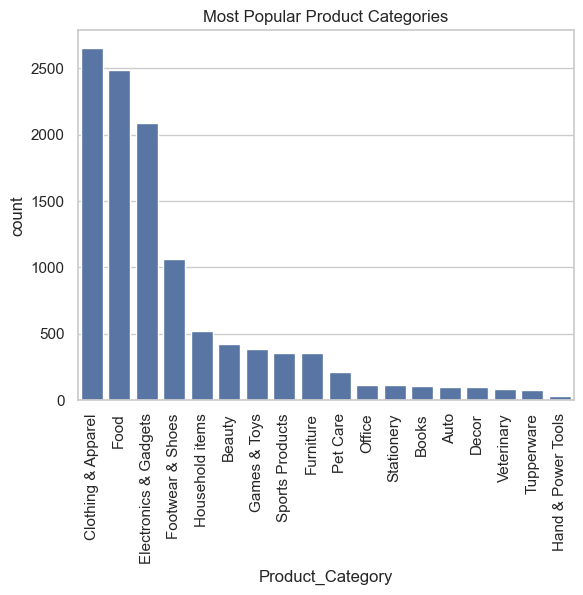

In [45]:
sns.countplot(data = df, x = 'Product_Category', order = df['Product_Category'].value_counts().index)
plt.title('Most Popular Product Categories')
plt.xticks(rotation = 90)
plt.show()

### Create a bar chart to show the total amount by product category for the top categories.

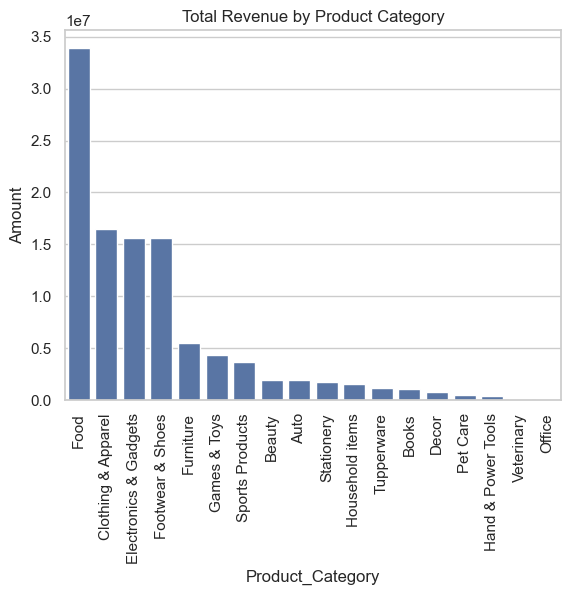

In [48]:
cat_amount = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data = cat_amount, x = 'Product_Category', y = 'Amount')
plt.title('Total Revenue by Product Category')
plt.xticks(rotation = 90)
plt.show()

## Conclusion

### Top spenders: Females aged 26–35 from Uttar .
### Top category: Clothing and Apparel.
### Top occupation: IT professionals.
### Marital status impact: Unmarried individuals spend more.

Additional Questions
1. Which age group contributes the most to each product category, and does this vary by
gender?
2. How does the amount spent vary by marital status across different age groups?
3. Which states show the highest growth in orders and revenue, and are there seasonal
spikes in sales?
4. Are there specific occupations that prefer particular product categories more than
others?
5. What is the correlation between age and spending amount, and does this differ by
gender?

Answeres
1. The age group of 26-35 contribute most to each product category and it varies by gender.
2. Accros different age groups its been observed that unmarried people spend more.
3. UP, Maharashtra and Karnataka shows highest growth in orders and revenue and seasonal spikes cannot be determined as the data is not timeseries data.
4. Aviation, Healthcare and IT Sector occupations prefer Food category more than others
5. People below the age of 55 spend more with femals spending slighty more than males